<a href="https://colab.research.google.com/github/gurovic/MLCourse/blob/main/016_base_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Базовая статистика: описательные статистики и группировка

```python
Open In Colab
Open In Kaggle
```

### Подготовка среды

In [1]:
!pip install pandas>=0.25 numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Создание демо-данных

In [2]:
# Генерация данных о продажах в разных городах
np.random.seed(42)
cities = ['Москва', 'Санкт-Петербург', 'Казань', 'Новосибирск', 'Екатеринбург']
categories = ['Электроника', 'Одежда', 'Продукты', 'Книги', 'Косметика']

data = {
    'city': np.random.choice(cities, 500),
    'category': np.random.choice(categories, 500),
    'sales': np.random.randint(1000, 5000, 500),
    'customers': np.random.randint(5, 50, 500),
    'rating': np.round(np.random.uniform(3.0, 5.0, 500), 1)
}

df = pd.DataFrame(data)
df['revenue'] = df['sales'] * np.random.randint(500, 2000, 500) / 100
df['date'] = pd.date_range('2023-01-01', periods=500, freq='D')

# Добавим выбросы для демонстрации
df.loc[50:55, 'sales'] = 15000
df.loc[100:102, 'revenue'] = 100000

df.to_csv('sales_data.csv', index=False)
df.head()

,city,category,sales,customers,rating,revenue,date
0,Новосибирск,Книги,4531,17,3.9,69913.33,2023-01-01
1,Екатеринбург,Электроника,4051,22,4.7,43993.86,2023-01-02
2,Казань,Косметика,1355,36,4.1,20514.70,2023-01-03
3,Екатеринбург,Продукты,4055,36,4.1,64596.15,2023-01-04
4,Екатеринбург,Продукты,2347,39,3.1,40696.98,2023-01-05


## 🟢 Базовый уровень

### 1.1 Основные описательные статистики

In [3]:
# Общая статистика по числовым столбцам
print("Общая статистика:")
display(df.describe())

# Статистика для конкретного столбца
print("\nСтатистика по продажам:")
print(f"Среднее: {df['sales'].mean():.2f}")
print(f"Медиана: {df['sales'].median()}")
print(f"Стандартное отклонение: {df['sales'].std():.2f}")
print(f"Минимум: {df['sales'].min()}")
print(f"Максимум: {df['sales'].max()}")
print(f"Квартили: 25% - {df['sales'].quantile(0.25)}, 75% - {df['sales'].quantile(0.75)}")

Общая статистика:


,sales,customers,rating,revenue,date
count,500.000000,500.000000,500.000000,500.00000,500
mean,3166.034000,27.122000,3.985400,38150.22914,2023-09-07 12:00:00
min,1011.000000,5.000000,3.000000,5650.00000,2023-01-01 00:00:00
25%,1938.000000,16.000000,3.500000,21260.24500,2023-05-05 18:00:00
50%,3069.500000,28.000000,4.000000,33969.31000,2023-09-07 12:00:00
75%,4149.750000,38.000000,4.500000,52181.03250,2024-01-10 06:00:00
max,15000.000000,49.000000,5.000000,100000.00000,2024-05-14 00:00:00
std,1776.564004,12.924287,0.569505,21271.69472,NaN



Статистика по продажам:
Среднее: 3166.03
Медиана: 3069.5
Стандартное отклонение: 1776.56
Минимум: 1011
Максимум: 15000
Квартили: 25% - 1938.0, 75% - 4149.75


### 1.2 Простая группировка

In [4]:
# Средние продажи по городам
city_sales = df.groupby('city')['sales'].mean()
print("\nСредние продажи по городам:")
display(city_sales)

# Суммарная выручка по категориям
category_revenue = df.groupby('category')['revenue'].sum()
print("\nСуммарная выручка по категориям:")
display(category_revenue)

# Количество записей по городам
city_counts = df['city'].value_counts()
print("\nКоличество записей по городам:")
display(city_counts)


Средние продажи по городам:


,sales
city,
Екатеринбург,2925.784946
Казань,3193.428571
Москва,3349.247706
Новосибирск,3284.080357
Санкт-Петербург,3025.600000



Суммарная выручка по категориям:


,revenue
category,
Книги,3661990.29
Косметика,3908268.88
Одежда,3606443.36
Продукты,4181435.98
Электроника,3716976.06



Количество записей по городам:


,count
city,
Новосибирск,112
Москва,109
Санкт-Петербург,95
Екатеринбург,93
Казань,91


### 1.3 Визуализация базовой статистики

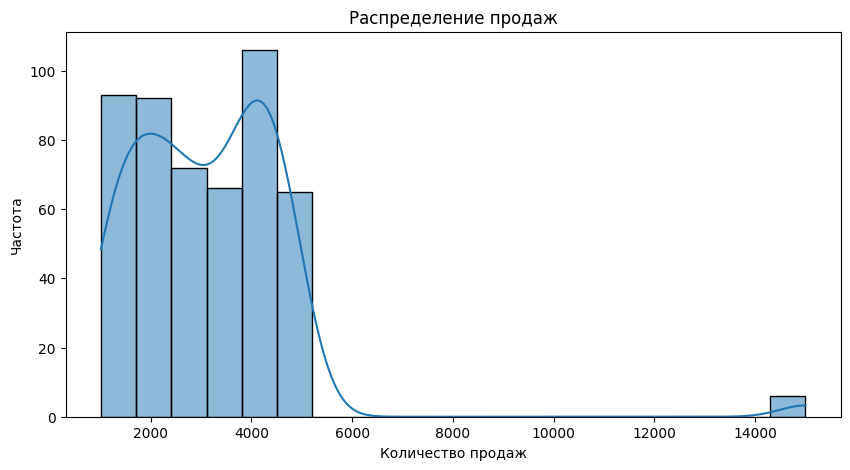

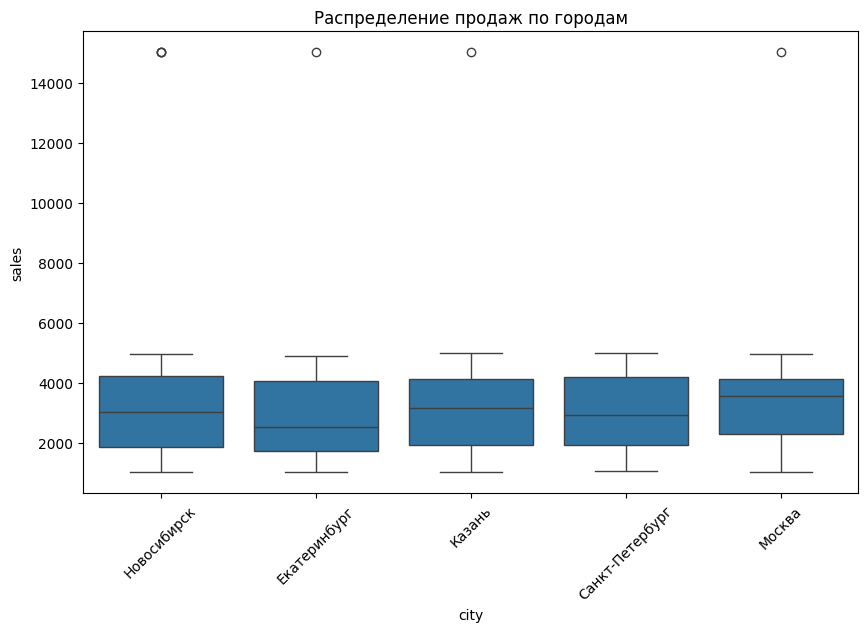

In [5]:
# Гистограмма продаж
plt.figure(figsize=(10, 5))
sns.histplot(df['sales'], bins=20, kde=True)
plt.title('Распределение продаж')
plt.xlabel('Количество продаж')
plt.ylabel('Частота')
plt.show()

# Боксплот по городам
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='sales', data=df)
plt.title('Распределение продаж по городам')
plt.xticks(rotation=45)
plt.show()

## 🟡 Продвинутый уровень

### 2.1 Группировка по нескольким признакам

In [6]:
# Группировка по городу и категории
city_category = df.groupby(['city', 'category'])['sales'].mean().unstack()
print("\nСредние продажи по городам и категориям:")
display(city_category)

# Агрегация нескольких метрик
city_stats = df.groupby('city').agg({
    'sales': ['mean', 'median', 'std'],
    'revenue': 'sum',
    'rating': 'mean'
})
print("\nСтатистика по городам:")
display(city_stats)


Средние продажи по городам и категориям:


category,Книги,Косметика,Одежда,Продукты,Электроника
city,,,,,
Екатеринбург,2485.285714,3414.322581,3324.250000,2737.944444,2349.222222
Казань,3223.944444,3430.526316,2566.214286,3305.833333,3257.750000
Москва,3682.368421,3539.500000,2917.461538,3195.222222,3490.318182
Новосибирск,3170.863636,2697.428571,3736.551724,3665.857143,2882.730769
Санкт-Петербург,3110.809524,2881.565217,2999.071429,3202.111111,2958.105263



Статистика по городам:


sales                          revenue    rating
                        mean  median          std         sum      mean
city                                                                   
Екатеринбург     2925.784946  2523.0  1767.169266  3376972.85  4.020430
Казань           3193.428571  3175.0  1751.352678  3417553.54  4.008791
Москва           3349.247706  3571.0  1583.584846  4472897.30  3.961468
Новосибирск      3284.080357  3016.0  2295.090778  4404032.52  4.028571
Санкт-Петербург  3025.600000  2928.0  1235.664154  3403658.36  3.905263

### 2.2 Анализ распределений

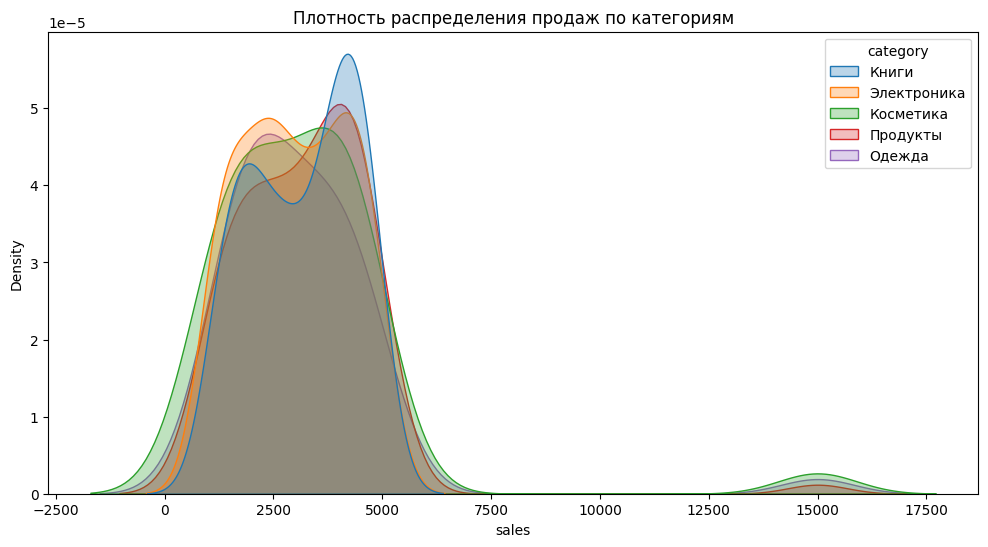

/tmp/ipython-input-7-1139242249.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='sales', data=df, estimator='mean', ci=None, color='skyblue', alpha=0.7)
/tmp/ipython-input-7-1139242249.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='sales', data=df, estimator='median', ci=None, color='red', alpha=0.5)


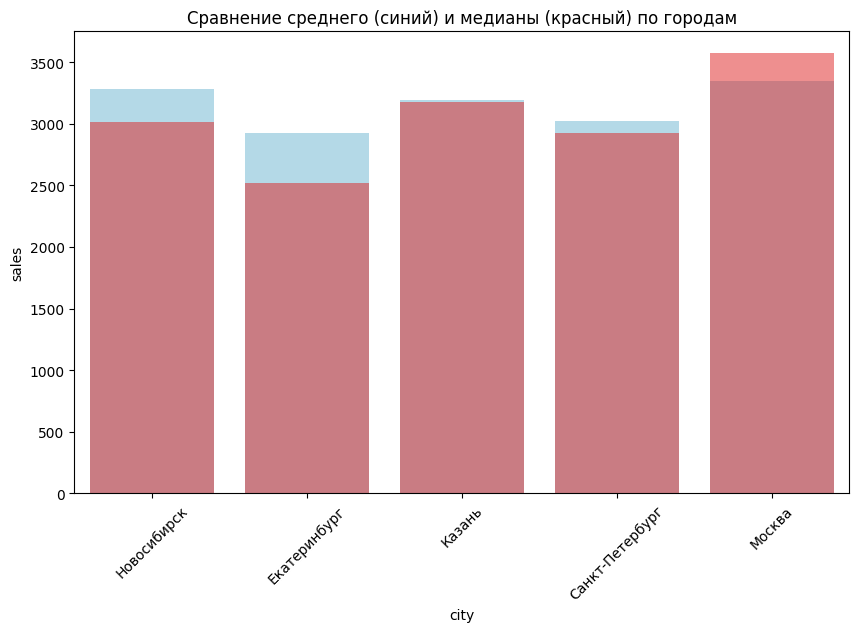

In [7]:
# Плотность распределения с разбивкой по категориям
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='sales', hue='category', fill=True, alpha=0.3)
plt.title('Плотность распределения продаж по категориям')
plt.show()

# Сравнение среднего и медианы
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='sales', data=df, estimator='mean', ci=None, color='skyblue', alpha=0.7)
sns.barplot(x='city', y='sales', data=df, estimator='median', ci=None, color='red', alpha=0.5)
plt.title('Сравнение среднего (синий) и медианы (красный) по городам')
plt.xticks(rotation=45)
plt.show()

### 2.3 Работа с пропусками в группировках

In [8]:
# Добавим пропуски для демонстрации
df.loc[10:15, 'rating'] = np.nan

# Группировка с обработкой пропусков
rating_stats = df.groupby('city')['rating'].agg(
    mean_rating='mean',
    median_ratin='median',
    count='count',
    non_null_count=lambda x: x.notnull().sum())

print("\nСтатистика по рейтингу с обработкой пропусков:")
display(rating_stats)


Статистика по рейтингу с обработкой пропусков:


,mean_rating,median_ratin,count,non_null_count
city,,,,
Екатеринбург,4.029348,4.10,92,92
Казань,4.015556,4.05,90,90
Москва,3.961468,4.00,109,109
Новосибирск,4.032727,4.10,110,110
Санкт-Петербург,3.907527,3.80,93,93


## 🔴 Экспертный уровень

### 3.1 Пользовательские функции агрегации

In [9]:
# Функция для расчета интерквартильного размаха
def iqr(series):
    return series.quantile(0.75) - series.quantile(0.25)

# Функция для расчета коэффициента вариации
def cv(series):
    return (series.std() / series.mean()) * 100

# Расширенная статистика с пользовательскими функциями
advanced_stats = df.groupby('category').agg({
    'sales': ['mean', 'median', 'std', iqr, cv],
    'revenue': ['sum', 'mean', lambda x: x.max() - x.min()]
}).rename(columns={'<lambda_0>': 'revenue_range'})

print("\nРасширенная статистика по категориям:")
display(advanced_stats)


Расширенная статистика по категориям:


sales                                              revenue  \
                    mean  median          std      iqr         cv         sum   
category                                                                        
Книги        3168.893617  3358.0  1193.951400  2236.75  37.677232  3661990.29   
Косметика    3243.351351  3006.0  2323.930775  2353.50  71.652144  3908268.88   
Одежда       3179.147368  2799.0  2086.886299  1955.00  65.642956  3606443.36   
Продукты     3239.979798  3248.0  1709.076962  2163.50  52.749618  4181435.98   
Электроника  2993.584158  3007.0  1218.323892  2154.00  40.697833  3716976.06   

                                         
                     mean revenue_range  
category                                 
Книги        38957.343511      91276.30  
Косметика    35209.629550      91472.90  
Одежда       37962.561684      87846.08  
Продукты     42236.727071      94350.00  
Электроника  36801.743168      86762.00

### 3.2 Трансформации внутри групп

In [10]:
# Нормализация внутри групп (z-score по категориям)
df['sales_zscore'] = df.groupby('category')['sales'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Ранжирование внутри групп
df['sales_rank'] = df.groupby('category')['sales'].rank(ascending=False)

print("\nДанные с z-score и рангами продаж:")
display(df[['category', 'sales', 'sales_zscore', 'sales_rank']].head(10))


Данные с z-score и рангами продаж:


,category,sales,sales_zscore,sales_rank
0,Книги,4531,1.140839,15.0
1,Электроника,4051,0.867927,28.0
2,Косметика,1355,-0.812568,95.0
3,Продукты,4055,0.476877,33.0
4,Продукты,2347,-0.522492,68.0
5,Электроника,4204,0.993509,24.0
6,Книги,3935,0.641656,35.0
7,Книги,4876,1.429796,3.0
8,Косметика,2863,-0.163667,59.0
9,Электроника,1126,-1.532913,97.0


### 3.3 Фильтрация по групповым статистикам

In [11]:
# Фильтрация городов со средней выручкой выше общего среднего
mean_revenue = df['revenue'].mean()
high_revenue_cities = df.groupby('city').filter(
    lambda group: group['revenue'].mean() > mean_revenue
)
print(f"\nГорода со средней выручкой выше {mean_revenue:.2f}:")
print(high_revenue_cities['city'].unique())

# Фильтрация категорий с большим разбросом продаж
high_variability = df.groupby('category').filter(
    lambda group: group['sales'].std() > 2000
)
print("\nКатегории с высоким разбросом продаж:")
print(high_variability['category'].unique())


Города со средней выручкой выше 38150.23:
['Новосибирск' 'Москва']

Категории с высоким разбросом продаж:
['Косметика' 'Одежда']


### 3.4 Временные группировки

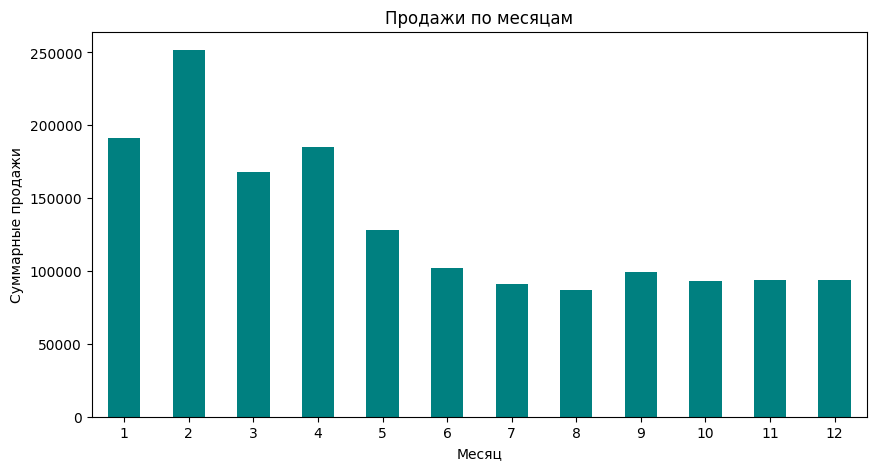

In [12]:
# Группировка по месяцам
df['month'] = df['date'].dt.month
monthly_sales = df.groupby('month')['sales'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='teal')
plt.title('Продажи по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=0)
plt.show()

## 📊 Чеклист по уровням

| Уровень  | Навыки |
|----------|--------|
| 🟢       | describe(), mean(), median(), groupby(), value_counts(), гистограммы |
| 🟡       | Группировка по нескольким признакам, agg(), kdeplot, обработка пропусков |
| 🔴       | Пользовательские агрегаторы, transform(), filter(), временные группировки |

## ⚠️ Критические ошибки

1. **Слепая вера в среднее**: использование среднего при наличии выбросов  
2. **Игнорирование размера группы**: сравнение групп разного размера без нормализации  
3. **Некорректные группировки**: группировка непрерывных переменных без бининга  
4. **Путаница в агрегаторах**: применение sum() к средним значениям

## 💡 Главные принципы

1. **Всегда смотрите на распределение** перед расчетом статистик  
2. **Сравнивайте медиану и среднее** для выявления выбросов  
3. **Нормализуйте данные** при сравнении групп разного размера  
4. **Проверяйте размер групп** - маленькие группы ненадежны  
5. **Используйте несколько метрик** для комплексного анализа

## 📌 Итог

Базовые статистики и группировка - фундамент анализа данных:
- **Описательные статистики** дают первое представление о данных
- **Группировка** позволяет анализировать подгруппы и выявлять паттерны
- **Визуализация** помогает понять распределение и результаты группировки

> 💡 Правило: "Статистика без визуализации слепа, визуализация без статистики пуста. Всегда сочетайте эти подходы для глубокого анализа данных."

**Практическое задание**:
1. Для каждого города рассчитайте:
   - Средний рейтинг
   - Общую выручку
   - Коэффициент вариации продаж
2. Определите категорию с самым высоким средним чеком (revenue/sales)
3. Выявите город с самым стабильным уровнем продаж (наименьшее стандартное отклонение)
4. Постройте график накопленной выручки по месяцам